In [5]:
import pandas as pd
import itertools 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline 

In [7]:
# import dataset
df = pd.read_csv('C:\\Users\\Madhulika\\Downloads\\Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Univariate Analysis

In [8]:
df.shape

(10000, 14)

In [9]:
df.groupby(['Geography']).count()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Geography,,,,,,,,,,,,,
France,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014,5014
Germany,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509,2509
Spain,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477,2477


In [12]:
freq_table=df.groupby(['Geography']).size().reset_index(name='Count').rename(columns={'Geography':'Geography'})
freq_table

,Geography,Count
0,France,5014
1,Germany,2509
2,Spain,2477


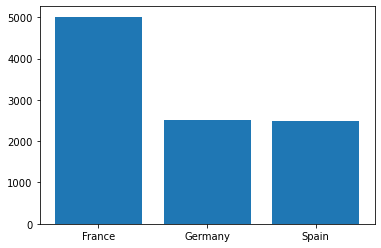

In [13]:
plt.bar(freq_table['Geography'],freq_table['Count'])
plt.show()

In [14]:
freq_table['Count%']=freq_table['Count']/sum(freq_table['Count'])*100
freq_table

,Geography,Count,Count%
0,France,5014,50.14
1,Germany,2509,25.09
2,Spain,2477,24.77


# Categorical Variable Analysis

In [18]:
df_plot=df.groupby(['IsActiveMember','Geography']).size().reset_index.pivot(columns='IsActiveMember',index='Geography',values=0)
df.plot.plot(x=df.plot_index,kind='bar',stacked=True)

AttributeError: 'function' object has no attribute 'pivot'

# Missing Values

In [20]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [28]:
df.shape

(10000, 14)

In [29]:
df.dropna(how='any').shape

(10000, 14)

## Remove Outliers

In [30]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# (BoxPlot)

In [36]:
def plot_boxplot(df,ft):
    df.boxplot(column=[ft])
    plt.grid(False)
    plt.show()

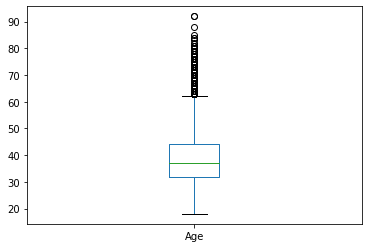

In [65]:
plot_boxplot(df,"Age")

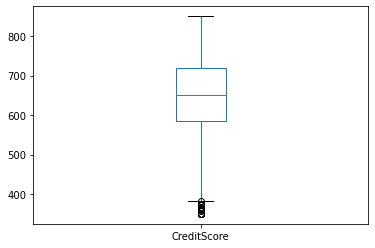

In [66]:
plot_boxplot(df,"CreditScore")

In [67]:
def outliers(df,ft):
    Q1=df[ft].quantile(0.25)
    Q3=df[ft].quantile(0.25)
    IQR=Q3-Q1
    
    lower_bound=Q1-1.5*IQR
    upper_bound=Q1+1.5*IQR
    
    ls=df.index[(df[ft]<lower_bound) | (df[ft]>upper_bound)]
    return ls

In [73]:
index_list=[]
for feature in['CreditScore','Age']:
    index_list.extend(outliers(df,feature))

In [76]:
index_list

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,


In [77]:
def remove(df,ls):
    ls=sorted(set(ls))
    df=df.drop(ls)
    return df

In [78]:
df_cleaned=remove(df,index_list)

In [79]:
df_cleaned.shape

(3, 14)

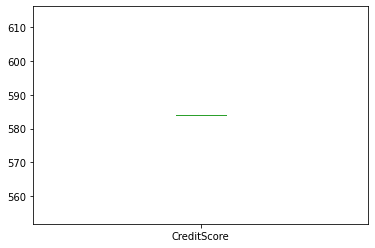

In [80]:
plot_boxplot(df_cleaned,'CreditScore')

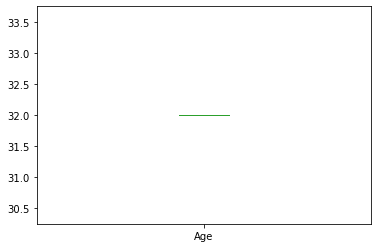

In [81]:
plot_boxplot(df_cleaned,'Age')

## Splitting data into dependent and independent variables

In [90]:
X=df.iloc[:,2:12]
X

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,Hargrave,619,France,Female,42,2,0.00,1,1,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1
2,Onio,502,France,Female,42,8,159660.80,3,1,0
3,Boni,699,France,Female,39,1,0.00,2,0,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1
...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1
9997,Liu,709,France,Female,36,7,0.00,1,0,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0


In [89]:
Y=df.iloc[:,12]
Y

0       101348.88
1       112542.58
2       113931.57
3        93826.63
4        79084.10
          ...    
9995     96270.64
9996    101699.77
9997     42085.58
9998     92888.52
9999     38190.78
Name: EstimatedSalary, Length: 10000, dtype: float64

## Splitting data into training and testing

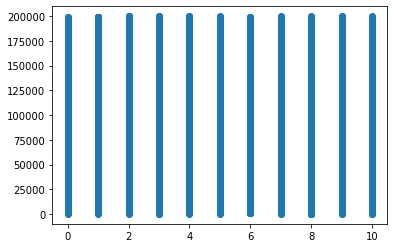

In [101]:
plt.scatter(df['Tenure'],df['EstimatedSalary'])

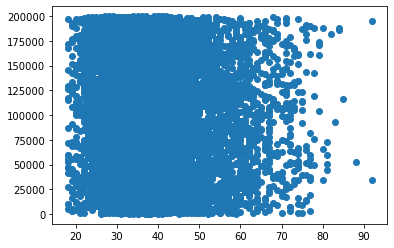

In [99]:
plt.scatter(df['Age'],df['EstimatedSalary'])

In [102]:
X = df[['Tenure','Age']]

In [103]:
y = df['EstimatedSalary']

In [104]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3) 

In [105]:
X_train

,Tenure,Age
7506,4,44
6699,3,41
6982,4,50
3758,4,38
4383,4,42
...,...,...
142,5,43
3869,7,31
369,2,29
3011,8,30


In [106]:
X_test

,Tenure,Age
9135,7,49
487,3,39
4075,5,43
7321,9,36
5377,1,72
...,...,...
8041,1,50
3588,3,40
4133,3,33
8859,10,32


In [107]:
y_train

7506    171345.02
6699     71672.86
6982       861.40
3758     16717.11
4383       676.06
          ...    
142     193318.33
3869     49326.07
369      34004.44
3011     36251.00
8456     85286.30
Name: EstimatedSalary, Length: 7000, dtype: float64

In [108]:
y_test

9135    190457.87
487      14353.43
4075    130001.13
7321    105818.51
5377    142223.94
          ...    
8041     88566.90
3588    171867.08
4133     73018.74
8859     60907.49
92      109614.57
Name: EstimatedSalary, Length: 3000, dtype: float64

# (linear regression model)


In [109]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [110]:
X_test

,Tenure,Age
9135,7,49
487,3,39
4075,5,43
7321,9,36
5377,1,72
...,...,...
8041,1,50
3588,3,40
4133,3,33
8859,10,32


In [111]:
clf.predict(X_test)

array([ 98701.63169627,  99682.40854591,  99282.41424907, ...,
       100224.77331377, 100180.70519449,  99819.12868258])

In [112]:
y_test

9135    190457.87
487      14353.43
4075    130001.13
7321    105818.51
5377    142223.94
          ...    
8041     88566.90
3588    171867.08
4133     73018.74
8859     60907.49
92      109614.57
Name: EstimatedSalary, Length: 3000, dtype: float64

In [113]:
clf.score(X_test, y_test)

-0.0014282515177035382

# random_state argument


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)
X_test

,Tenure,Age
937,5,44
9355,8,40
2293,0,45
192,1,40
8675,7,54
...,...,...
4964,3,41
8978,2,41
7540,1,37
5275,8,42
